In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import sys
sys.path.append('../../modules')
from helper_functions import feature_reduction_x

In [5]:
df = pd.read_csv("../../data/training/BERRatingData_aa.csv", sep=";", on_bad_lines="skip", low_memory=False)
print(df.shape)

(9997, 211)


In [6]:
X = feature_reduction_x(df)

/Users/igor/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:479: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/igor/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [7]:
print(X.shape)

(9997, 100)


In [8]:
y = df.EnergyRating

In [9]:
X = pd.get_dummies(X)

feature_names = X.columns
X.head()

,CHPFuelType,CHPHeatEff,UValueWall,CHPElecEff,CHPSystemType,FirstWallUValue,DistLossFactor,UValueWindow,CHPUnitHeatFraction,UValueRoof,...,ChargingBasisHeatConsumed_YES,ChargingBasisHeatConsumed_NO,MainSpaceHeatingFuel_Heating Oil,FirstEnerProdDelivered,MainWaterHeatingFuel_Heating Oil,HSSupplSystemEff,SecondWallType_Description_Stone,NoOfFansAndVents,ThermalMassCategory_Medium-low,PrimaryCircuitLoss_Boiler with insulated primary
0,NaN,NaN,0.034783,NaN,NaN,0.034783,NaN,0.245614,NaN,0.069565,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.066667,1.0,1.0
1,NaN,NaN,0.034783,NaN,NaN,0.034783,NaN,0.245614,NaN,0.069565,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.066667,1.0,1.0
2,NaN,NaN,0.330435,NaN,NaN,0.426087,NaN,0.543860,NaN,0.373913,...,0.0,1.0,1.0,0.0,1.0,0.107527,0.0,0.066667,0.0,0.0
3,NaN,NaN,0.108696,NaN,NaN,0.108696,NaN,0.473684,NaN,0.056522,...,0.0,1.0,0.0,0.0,0.0,0.053763,0.0,0.000000,0.0,0.0
4,NaN,NaN,0.121739,NaN,NaN,0.073913,NaN,0.543860,NaN,0.682609,...,0.0,1.0,1.0,0.0,1.0,0.116487,0.0,0.066667,0.0,0.0


In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=2)

In [11]:
for d in range(2,15):
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Depth: ", d, "Accuracy:", scores.mean())

Depth:  2 Accuracy: 0.317460440293529
Depth:  3 Accuracy: 0.3456031131865688
Depth:  4 Accuracy: 0.35987929730931734
Depth:  5 Accuracy: 0.3728191238603514
Depth:  6 Accuracy: 0.41283255503669114
Depth:  7 Accuracy: 0.40922748498999334
Depth:  8 Accuracy: 0.429369090504781
Depth:  9 Accuracy: 0.4376459862130309
Depth:  10 Accuracy: 0.4528482988659106
Depth:  11 Accuracy: 0.4553813653546809
Depth:  12 Accuracy: 0.4588500778296642
Depth:  13 Accuracy: 0.45271585501445416
Depth:  14 Accuracy: 0.4537832332666222


In [12]:
model = DecisionTreeClassifier(max_depth=14)
model.fit(X_train,y_train)


print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.6776043750833667
Test Accuracy: 0.4632


In [13]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)

print("CM")
print(cm)

CM
[[  3   2   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  1 227  61   2   2   0   0   0   0   0   1   0   0   0   0]
 [  0  43 300  13   1   2   0   0   0   1   0   0   0   0   0]
 [  0   1  16  14  24  11   2   0   0   0   1   0   0   0   0]
 [  0   0   2   8  57  42   9   2   1   1   0   2   0   0   0]
 [  0   1   1   6  37 111  52  16   3   3   5   0   0   0   0]
 [  0   0   0   2  14  72 118  60  17  15   5   0   2   0   0]
 [  0   0   0   0   4  24  65  86  30  23  24   1   0   0   1]
 [  0   0   0   0   4   6  30  53  41  43  20   5   1   0   0]
 [  0   0   0   0   0   1  16  26  31  47  51   8   2   0   0]
 [  0   0   0   0   2   0   7   9  21  29  68  13   9   2   1]
 [  0   0   0   0   3   0   3   3   0  11  40   8   9   3   3]
 [  0   0   0   0   1   0   0   1   1   8  25   7   6   3   7]
 [  0   0   0   0   0   0   1   1   0   4  22  10   4   6  12]
 [  0   0   0   0   0   0   0   0   0   0  16   5   6   8  66]]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.139398 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.139398 to fit



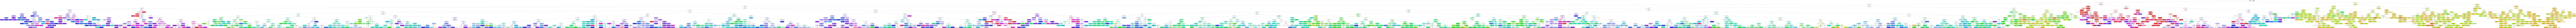

In [11]:
dot_data = StringIO()
target_names = ["A3", "C1", "A2", "C2", "B3", "C3", "D1", "D2", "B2", "G", "E1", "B1", "F", "E2", "A1"]
export_graphviz(model, 
                out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True,
                class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('BER_DecisionTree.png')
Image(graph.create_png())